In [1]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Loading data
**CIFAR10 dataset** contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


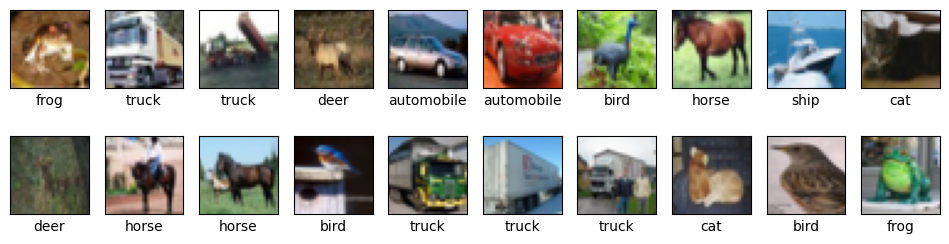

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12,3))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,210 (481.29 KB)

 Trainable params: 122,890 (480.04 KB)

 Non-trainable params: 320 (1.25 KB)

**SparseCategoricalCrossentropy:** Expects the target to be an int corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9. **CategoricalCrossentropy:** Expects the target value of an example to be one-hot encoded where the value at the target index is 1, which the other N-1 entries are 0. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].

In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# Early Stopping
**monitor:** “monitor” argument helps us select the performance measure that we want to track, such as validation loss or validation accuracy.

**mode:** mode can be set to ‘min’ or ‘max’ to monitor the minimum or maximum value, respectively. By default, it is set to ‘auto’ and automatically detects what we want to achieve, either maximizing the accuracy or minimizing the loss.

**patience:** Sometimes, the first time, we reach our lowest point in the validation loss the first time. It is not the best performance of our model. We can use ‘patience’ to set the number of epochs with no improvement after which the training is stopped.

**verbose:** To know the epoch number on which the training was stopped, we set the verbose to 1.

**restore_best_weights:** To keep the best weights once the training is stopped, we set this to True.

In [ ]:
# An epoch means training the neural network with all the
# training data for one cycle. Here I use 50 epochs

earlystop = EarlyStopping(monitor = 'val_loss', mode= 'min', patience = 25, verbose = 1, restore_best_weights = True)
history = model.fit(train_images, train_labels, epochs=50, callbacks = earlystop,
                    validation_data=(test_images, test_labels))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 82s 51ms/step - loss: 1.5374 - accuracy: 0.4400 - val_loss: 1.2465 - val_accuracy: 0.5541
Epoch 2/50
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1604 - accuracy: 0.5887 - val_loss: 1.0735 - val_accuracy: 0.6187
Epoch 3/50
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0131 - accuracy: 0.6420 - val_loss: 0.9838 - val_accuracy: 0.6541
Epoch 4/50
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9153 - accuracy: 0.6794 - val_loss: 0.9324 - val_accuracy: 0.6755
Epoch 5/50
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8501 - accuracy: 0.7026 - val_loss: 0.8717 - val_accuracy: 0.6967
Epoch 6/50
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7879 - accuracy: 0.7250 - val_loss: 0.8562 - val_accuracy: 0.7054
Epoch 7/50
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7398 - accuracy: 0.7408 - val_loss: 0.8868 - val_accura

313/313 - 6s - loss: 0.8562 - accuracy: 0.7054 - 6s/epoch - 18ms/step


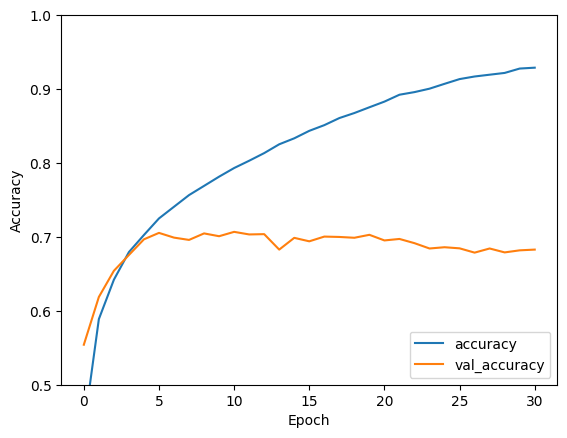

In [ ]:
# Evaluate the model

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

With Regularizer

In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,210 (481.29 KB)

 Trainable params: 122,890 (480.04 KB)

 Non-trainable params: 320 (1.25 KB)

In [4]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [5]:
# An epoch means training the neural network with all the
# training data for one cycle. Here I use 50 epochs

earlystop = EarlyStopping(monitor = 'val_loss', mode= 'min', patience = 25, verbose = 1, restore_best_weights = True)
history = model.fit(train_images, train_labels, epochs=50, callbacks = earlystop,
                    validation_data=(test_images, test_labels))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.3762 - loss: 1.8108 - val_accuracy: 0.5617 - val_loss: 1.2355
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5700 - loss: 1.2179 - val_accuracy: 0.5784 - val_loss: 1.1597
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6239 - loss: 1.0674 - val_accuracy: 0.6530 - val_loss: 0.9748
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6516 - loss: 0.9900 - val_accuracy: 0.6860 - val_loss: 0.8824
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6801 - loss: 0.9104 - val_accuracy: 0.6811 - val_loss: 0.9003
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7002 - loss: 0.8527 - val_accuracy: 0.6897 - val_loss: 0.9065
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7101 - loss: 0.8225 - val_accuracy: 0.7075 - val_loss: 0.8374
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7223 - loss: 0.7864 - val_acc

313/313 - 1s - 3ms/step - accuracy: 0.7693 - loss: 0.6880


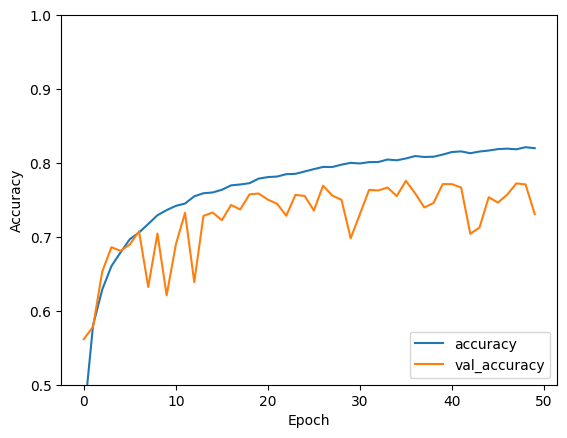

In [6]:
# Evaluate the model

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [7]:
from tensorflow.keras import regularizers

# Define the regularizer
reg = regularizers.l1_l2(l1=1e-5, l2=1e-4)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=reg, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=reg))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=reg))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))  # Output layer typically doesn’t need regularization

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,210 (481.29 KB)

 Trainable params: 122,890 (480.04 KB)

 Non-trainable params: 320 (1.25 KB)

In [9]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [10]:
# An epoch means training the neural network with all the
# training data for one cycle. Here I use 50 epochs

earlystop = EarlyStopping(monitor = 'val_loss', mode= 'min', patience = 25, verbose = 1, restore_best_weights = True)
history = model.fit(train_images, train_labels, epochs=50, callbacks = earlystop,
                    validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.3688 - loss: 1.9078 - val_accuracy: 0.5232 - val_loss: 1.3644
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5605 - loss: 1.3236 - val_accuracy: 0.6202 - val_loss: 1.1364
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6177 - loss: 1.1794 - val_accuracy: 0.6447 - val_loss: 1.1273
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6560 - loss: 1.0854 - val_accuracy: 0.5892 - val_loss: 1.2830
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6767 - loss: 1.0409 - val_accuracy: 0.5971 - val_loss: 1.2953
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6921 - loss: 1.0033 - val_accuracy: 0.6651 - val_loss: 1.0916
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7045 - loss: 0.9787 - val_accuracy: 0.7128 - val_loss: 0.9806
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7176 - loss: 0.95

313/313 - 1s - 2ms/step - accuracy: 0.7815 - loss: 0.8520


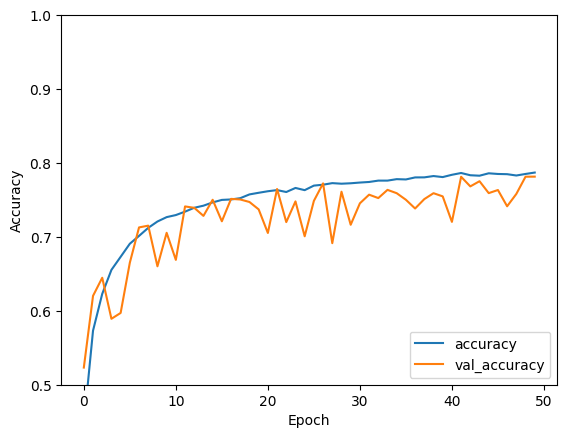

In [11]:
# Evaluate the model

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [12]:
# Define the regularizer
reg = regularizers.l1_l2(l1=1e-5, l2=1e-4)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=reg, input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=reg))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=reg))

model.add(Dense(10, activation='softmax'))  # Output layer typically doesn’t need regularization

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,210 (481.29 KB)

 Trainable params: 122,890 (480.04 KB)

 Non-trainable params: 320 (1.25 KB)

In [13]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [14]:
# An epoch means training the neural network with all the
# training data for one cycle. Here I use 50 epochs

earlystop = EarlyStopping(monitor = 'val_loss', mode= 'min', patience = 25, verbose = 1, restore_best_weights = True)
history = model.fit(train_images, train_labels, epochs=50, callbacks = earlystop,
                    validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.4477 - loss: 1.6667 - val_accuracy: 0.4897 - val_loss: 1.6350
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6522 - loss: 1.0672 - val_accuracy: 0.6507 - val_loss: 1.0865
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7205 - loss: 0.8917 - val_accuracy: 0.5950 - val_loss: 1.3116
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7522 - loss: 0.8149 - val_accuracy: 0.7189 - val_loss: 0.9390
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7843 - loss: 0.7416 - val_accuracy: 0.6920 - val_loss: 1.0660
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8075 - loss: 0.6798 - val_accuracy: 0.7116 - val_loss: 1.0115
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8285 - loss: 0.6398 - val_accuracy: 0.6275 - val_loss: 1.5027
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8407 - loss: 0.61

313/313 - 1s - 2ms/step - accuracy: 0.7189 - loss: 0.9390


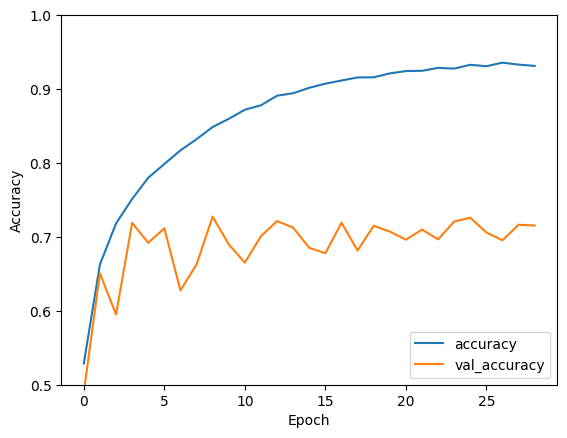

In [15]:
# Evaluate the model

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

# Improving the Performance
To further improve the performance of your CNN, you may want to consider the following tips −

**Fine-tune the architecture −** There are many different ways to design a CNN,
and the best architecture for your task will depend on the specific characteristics of your data. You can experiment with different numbers of layers, kernel sizes, strides, and so on, to see what works best for your task.

**Use data augmentation −** Data augmentation is a technique that involves generating additional training data by applying transformations to the existing data. This can be useful for improving generalization performance, especially when you have a limited amount of training data.

**Use pre-trained models −** Pre-trained models are CNNs that have been trained on a large dataset, such as ImageNet, and can be used as a starting point for your own task. Transfer learning, which involves fine-tuning a pre-trained model on your own dataset, is a powerful technique that can greatly speed up training and improve performance.

**Optimize the hyperparameters −** The performance of your CNN can also be improved by optimizing the hyperparameters, such as the learning rate, batch size, and so on. You can use techniques like grid search or random search to find the optimal set of hyperparameters for your task.

**To Do:**
Try using different architecture, learning rate, optimizer and batch size, Plot the confusion matrix, calculate the claswise (using classification_report) and overall (using precision_score, recall_score, accuracy_score, f1_score) precision, recall, F1 score and accuracy